In [1]:
from ase.io import read
from ase import Atoms
from ase.optimize import *
from ase.visualize import view
from ase.md import *
from ase.calculators.mopac import  *
from ase.constraints import *
from math import *
import nglview
import numpy as np
import scipy.misc
import matplotlib.pyplot as pyplot
from ase.optimize.sciopt import SciPyFminBFGS, SciPyFminCG

In [2]:
# You should send it to us till Tuesday 06/01
# Discussion: Tu 06/06

In [3]:
# Based on what you have learnt in 02.01_scan1D-ass & 02.01_scan1D-diss repeat scanning potential energy surface-
# -but this time please derive two-dimensional potential energy surfaces to find the possible transition state!


In [2]:
# Input intial file
model = "A"
infile  = "input/%s.xyz" % model
A   = read(infile, format="xyz")
molecule = Atoms(A)

# visualize initial structure
wdg_init = nglview.show_ase(molecule)
wdg_init.add_representation('ball+stick')
wdg_init.center_view(range(3))


In [3]:

calc=Mopac(restart=0, spin=0, OPT=False, functional='PM6', job_type='NOANCI CHARGE=-1 NOSYM 1SCF GRADIENTS AUX(0,PRECISION=9)', RELSCF=0.01 )

molecule.set_calculator(calc)

ener=molecule.get_potential_energy()
print "potential energy:", ener


atomC=0 # C
atomA=4 #Cl
atomB=5  #Br

bond1 = [molecule.get_distance(atomC, atomA), [atomC, atomA]]
bond2 = [molecule.get_distance(atomC, atomB), [atomC, atomB]]

print bond1, bond2

# Obtaining the distance between CH3  to Br and CH3 to Cl. 
B1=molecule.get_distance(atomC, atomA)
B2=molecule.get_distance(atomC, atomB)

# Defining the stepsize and number of step between Cl and CH3-Br  . 
stepsize=0.1
numstep=12
print "stepping distance by (", stepsize, " Angstroms) "

scan=np.zeros((numstep,numstep))
d=np.zeros(numstep)
df=np.zeros(numstep)
dd=np.zeros(numstep)
ddf=np.zeros(numstep)

for i in range (int(numstep)):

    d[i]=B1-i*stepsize
    molecule.set_distance(atomC, atomA, d[i], fix=0)
    df[i]=molecule.get_distance(atomC, atomA)
    for j in range (int(numstep)):

        dd[j]=B2+j*stepsize
        print "step", j, "dist", dd[j]
        molecule.set_distance(atomC, atomB, dd[j], fix=0)
        outfile="output/" + "sn1.cons.drive."+str(j)+".xyz"
        molecule.write(outfile)

        bond1 = [dd[j], [atomC, atomB]]
        bond2 = [d[i], [atomC, atomA]]
        cons = FixInternals(molecule,  bonds=[bond1, bond2])
        molecule.set_constraint(cons)


        ener=molecule.get_potential_energy()
        print "potential energy:", ener
        grad=molecule.get_forces()
        print "gradient", grad

        trajName="output/" + "drive.diss."+str(j)+".traj"
        dyn = QuasiNewton(molecule, trajectory=trajName)
        dyn.run(fmax=0.01, steps=10)

        ddf[j]=molecule.get_distance(atomC, atomB)
        print "dist after opt", ddf[i]
        ener=molecule.get_potential_energy()
        scan[i,j]=ener
        outfile_opt="output/" + "drive.diss."+str(j)+".opt.xyz"
        molecule.write(outfile_opt)
 

potential energy: -3.38210780044
[2.8146161926609103, [0, 4]] [2.0021656117604261, [0, 5]]
stepping distance by ( 0.1  Angstroms) 
step 0 dist 2.00216561176
potential energy: -3.38210780044
gradient [[  1.32259320e-02   2.16996858e-03  -3.18167268e-03]
 [ -1.02953652e-02  -2.32647494e-03   1.14865668e-03]
 [  7.20534014e-03   2.77847738e-03  -4.21063898e-03]
 [ -1.03588111e-02   3.59057377e-03   5.34976481e-03]
 [  1.55054727e-04  -3.26000334e-03  -6.79141168e-05]
 [  6.78493802e-05  -2.95254145e-03   9.61804279e-04]]
BFGSLineSearch:   0[  0]  17:17:19       -3.382108       0.0138
BFGSLineSearch:   1[  2]  17:17:21       -3.382121       0.0134
BFGSLineSearch:   2[  4]  17:17:23       -3.382131       0.0072
dist after opt 2.0021656204
step 1 dist 2.10216561176
potential energy: -3.30945729734
gradient [[-0.10397564  0.21793323 -0.07980572]
 [ 0.11016504 -0.22057786  0.06455618]
 [ 0.0953364  -0.22168892  0.08888798]
 [ 0.11730741 -0.20556271  0.08728042]
 [-0.10973322  0.21479271 -0.080

BFGSLineSearch:   0[  0]  17:20:20       -2.494942       1.7879
BFGSLineSearch:   1[  1]  17:20:21       -3.174547       1.7900
BFGSLineSearch:   2[  3]  17:20:23       -3.362406       0.2199
BFGSLineSearch:   3[  4]  17:20:24       -3.368827       0.1210
BFGSLineSearch:   4[  6]  17:20:26       -3.369139       0.0483
BFGSLineSearch:   5[  8]  17:20:28       -3.369434       0.0018
dist after opt 2.10216560306
step 1 dist 2.10216561176
potential energy: -3.32015739263
gradient [[-0.10917823  0.2190394  -0.07946112]
 [ 0.11187481 -0.22218395  0.06739817]
 [ 0.09851447 -0.22171648  0.0865448 ]
 [ 0.11888351 -0.21162717  0.08637225]
 [-0.11017456  0.21810336 -0.08062777]
 [-0.10991999  0.21838484 -0.08022634]]
BFGSLineSearch:   0[  0]  17:20:29       -3.320157       0.2577
BFGSLineSearch:   1[  1]  17:20:31       -3.332697       0.3063
BFGSLineSearch:   2[  3]  17:20:32       -3.337079       0.0502
BFGSLineSearch:   3[  4]  17:20:34       -3.337607       0.0366
BFGSLineSearch:   4[  6]  17

BFGSLineSearch:   0[  0]  17:25:32       -2.470522       1.7922
BFGSLineSearch:   1[  1]  17:25:33       -3.139270       1.7825
BFGSLineSearch:   2[  3]  17:25:35       -3.317892       0.2651
BFGSLineSearch:   3[  5]  17:25:37       -3.324185       0.2919
BFGSLineSearch:   4[  7]  17:25:38       -3.325992       0.0107
BFGSLineSearch:   5[  8]  17:25:40       -3.325999       0.0095
dist after opt 2.20216562223
step 1 dist 2.10216561176
potential energy: -3.30629908887
gradient [[-0.10371653  0.22711139 -0.0839649 ]
 [ 0.11404187 -0.22777904  0.06676895]
 [ 0.09339254 -0.23034352  0.09296631]
 [ 0.12108974 -0.2158844   0.08826066]
 [-0.11240792  0.22334863 -0.08225575]
 [-0.1123997   0.22354694 -0.08177527]]
BFGSLineSearch:   0[  0]  17:25:41       -3.306299       0.2654
BFGSLineSearch:   1[  1]  17:25:43       -3.319546       0.3241
BFGSLineSearch:   2[  3]  17:25:44       -3.323718       0.0680
BFGSLineSearch:   3[  5]  17:25:46       -3.324096       0.0828
BFGSLineSearch:   4[  7]  17

BFGSLineSearch:   0[  0]  17:32:50       -2.404235       1.8003
BFGSLineSearch:   1[  1]  17:32:52       -3.060300       1.7232
BFGSLineSearch:   2[  3]  17:32:53       -3.235727       0.2212
BFGSLineSearch:   3[  4]  17:32:55       -3.243802       0.1010
BFGSLineSearch:   4[  6]  17:32:56       -3.244147       0.0669
BFGSLineSearch:   5[  8]  17:32:58       -3.244462       0.0029
dist after opt 2.30216562364
step 1 dist 2.10216561176
potential energy: -3.26140638919
gradient [[-0.11472373  0.22970918 -0.08413477]
 [ 0.11828601 -0.2353039   0.0636142 ]
 [ 0.09665344 -0.23489791  0.09449228]
 [ 0.1303887  -0.21825207  0.09453983]
 [-0.11539146  0.22927291 -0.08440093]
 [-0.11521296  0.22947179 -0.08411061]]
BFGSLineSearch:   0[  0]  17:33:00       -3.261406       0.2712
BFGSLineSearch:   1[  1]  17:33:01       -3.275835       0.2857
BFGSLineSearch:   2[  3]  17:33:03       -3.279712       0.0491
BFGSLineSearch:   3[  4]  17:33:04       -3.280252       0.0364
BFGSLineSearch:   4[  6]  17

BFGSLineSearch:   4[  6]  17:37:55       -3.119189       0.0609
BFGSLineSearch:   5[  8]  17:37:57       -3.119601       0.0033
dist after opt 2.40216560033
step 1 dist 2.10216561176
potential energy: -3.18121269835
gradient [[-0.11811609  0.23609833 -0.08684305]
 [ 0.12261585 -0.2436659   0.05967334]
 [ 0.09412421 -0.24317271  0.10025719]
 [ 0.1386739  -0.2210011   0.10037427]
 [-0.11871596  0.2357927  -0.08684942]
 [-0.1185819   0.23594868 -0.08661232]]
BFGSLineSearch:   0[  0]  17:37:58       -3.181213       0.2795
BFGSLineSearch:   1[  1]  17:38:00       -3.197019       0.2727
BFGSLineSearch:   2[  3]  17:38:01       -3.200583       0.0473
BFGSLineSearch:   3[  4]  17:38:03       -3.201116       0.0275
BFGSLineSearch:   4[  6]  17:38:04       -3.201129       0.0068
dist after opt 2.40216560033
step 2 dist 2.20216561176
potential energy: -3.17872229725
gradient [[-0.10693058  0.21906328 -0.0800506 ]
 [ 0.11306719 -0.22469902  0.05542871]
 [ 0.08634327 -0.22479675  0.09304302]
 [ 0.1

BFGSLineSearch:   1[  1]  17:42:51       -3.081202       0.2586
BFGSLineSearch:   2[  3]  17:42:53       -3.084429       0.0458
BFGSLineSearch:   3[  4]  17:42:54       -3.084938       0.0308
BFGSLineSearch:   4[  6]  17:42:56       -3.084950       0.0071
dist after opt 2.50216562303
step 2 dist 2.20216561176
potential energy: -3.11441288159
gradient [[-0.11541613  0.2228604  -0.08342092]
 [ 0.11797319 -0.23364669  0.04959936]
 [ 0.08420952 -0.23267808  0.09862075]
 [ 0.13924539 -0.20525261  0.10051671]
 [-0.1130529   0.22432239 -0.08269826]
 [-0.11295906  0.22439461 -0.08261764]]
BFGSLineSearch:   0[  0]  17:42:58       -3.114413       0.2676
BFGSLineSearch:   1[  1]  17:42:59       -3.131524       0.1964
BFGSLineSearch:   2[  3]  17:43:01       -3.133284       0.0329
BFGSLineSearch:   3[  5]  17:43:03       -3.133466       0.0514
BFGSLineSearch:   4[  7]  17:43:04       -3.133513       0.0011
dist after opt 2.50216562303
step 3 dist 2.30216561176
potential energy: -3.11023084638
grad

BFGSLineSearch:   0[  0]  17:45:17       -3.020929       0.2778
BFGSLineSearch:   1[  1]  17:45:19       -3.039706       0.1743
BFGSLineSearch:   2[  3]  17:45:20       -3.041159       0.0321
BFGSLineSearch:   3[  5]  17:45:22       -3.041335       0.0498
BFGSLineSearch:   4[  7]  17:45:24       -3.041377       0.0008
dist after opt 2.60216561671
step 3 dist 2.30216561176
potential energy: -3.07524034228
gradient [[-0.10032972  0.20078926 -0.07343081]
 [ 0.10677766 -0.21143149  0.03501818]
 [ 0.06642753 -0.21055611  0.09314788]
 [ 0.12929108 -0.1792022   0.09325588]
 [-0.10109801  0.20019    -0.07400113]
 [-0.10106853  0.20021054 -0.07399   ]]
BFGSLineSearch:   0[  0]  17:45:25       -3.075240       0.2398
BFGSLineSearch:   1[  1]  17:45:27       -3.090589       0.1080
BFGSLineSearch:   2[  3]  17:45:28       -3.091166       0.0152
BFGSLineSearch:   3[  4]  17:45:30       -3.091206       0.0302
BFGSLineSearch:   4[  6]  17:45:31       -3.091215       0.0046
dist after opt 2.60216561671

BFGSLineSearch:   6[112]  17:47:28       -3.033023       0.0117
BFGSLineSearch:   7[151]  17:47:43       -3.033025       0.0073
dist after opt 2.70216561844
step 4 dist 2.40216561176
potential energy: -3.09050277606
gradient [[-0.08601792  0.18132373 -0.06024288]
 [ 0.09638943 -0.19106795  0.01875596]
 [ 0.04981298 -0.18957708  0.08735597]
 [ 0.11933498 -0.15546398  0.08567093]
 [-0.08980086  0.17736233 -0.06578377]
 [-0.0897186   0.17742295 -0.0657562 ]]
BFGSLineSearch:   0[  0]  17:47:45       -3.090503       0.2148
BFGSLineSearch:   1[  1]  17:47:46       -3.103253       0.0593
BFGSLineSearch:   2[  3]  17:47:48       -3.103354       0.0260
BFGSLineSearch:   3[  5]  17:47:50       -3.103374       0.0061
dist after opt 2.70216561844
step 5 dist 2.50216561176
potential energy: -3.13481916666
gradient [[-0.07440989  0.14537238 -0.05522514]
 [ 0.07944101 -0.1568901   0.0164647 ]
 [ 0.0397298  -0.15626586  0.0730527 ]
 [ 0.10306379 -0.12425144  0.07402558]
 [-0.07392171  0.14602071 -0.05

BFGSLineSearch:   0[  0]  17:49:19       -3.160636       0.1852
BFGSLineSearch:   1[  1]  17:49:20       -3.169949       0.0122
BFGSLineSearch:   2[  2]  17:49:21       -3.169980       0.0147
BFGSLineSearch:   3[  4]  17:49:22       -3.169985       0.0056
dist after opt 2.80216562123
step 6 dist 2.60216561176
potential energy: -3.22970505319
gradient [[-0.06598893  0.12712486 -0.04178821]
 [ 0.06973496 -0.13744761  0.00677885]
 [ 0.03311019 -0.13584343  0.06391031]
 [ 0.09104158 -0.10630466  0.0650633 ]
 [-0.06393402  0.12623072 -0.04701044]
 [-0.06396378  0.12624011 -0.0469538 ]]
BFGSLineSearch:   0[  0]  17:49:23       -3.229705       0.1543
BFGSLineSearch:   1[  1]  17:49:24       -3.236243       0.0381
BFGSLineSearch:   2[  3]  17:49:26       -3.236277       0.0171
BFGSLineSearch:   3[  5]  17:49:27       -3.236298       0.0087
dist after opt 2.80216562123
step 7 dist 2.70216561176
potential energy: -3.2745496187
gradient [[-0.04778006  0.0996561  -0.04186393]
 [ 0.05436    -0.1075

BFGSLineSearch:   0[  0]  17:51:55       -3.253031       0.1540
BFGSLineSearch:   1[  1]  17:51:56       -3.259151       0.0350
BFGSLineSearch:   2[  3]  17:51:58       -3.259228       0.0111
BFGSLineSearch:   3[  4]  17:51:59       -3.259240       0.0176
BFGSLineSearch:   4[  6]  17:52:00       -3.259246       0.0035
dist after opt 2.90216562104
step 7 dist 2.70216561176
potential energy: -3.33723201277
gradient [[-0.05003217  0.10148168 -0.03795424]
 [ 0.05731837 -0.11307796 -0.00395574]
 [ 0.01321317 -0.11227585  0.05853503]
 [ 0.08202323 -0.07809104  0.05863139]
 [-0.05127436  0.10098523 -0.03759948]
 [-0.05124824  0.10097794 -0.03765696]]
BFGSLineSearch:   0[  0]  17:52:01       -3.337232       0.1275
BFGSLineSearch:   1[  1]  17:52:02       -3.341431       0.0361
BFGSLineSearch:   2[  3]  17:52:03       -3.341503       0.0087
dist after opt 2.90216562104
step 8 dist 2.80216561176
potential energy: -3.39332653054
gradient [[-0.03265954  0.07727421 -0.03163742]
 [ 0.04214467 -0.083

BFGSLineSearch:   0[  0]  17:53:07       -3.306736       0.1241
BFGSLineSearch:   1[  1]  17:53:08       -3.310477       0.0467
BFGSLineSearch:   2[  3]  17:53:10       -3.310599       0.0102
BFGSLineSearch:   3[  4]  17:53:11       -3.310615       0.0212
BFGSLineSearch:   4[  9]  17:53:12       -3.310625       0.0100
BFGSLineSearch:   5[ 53]  17:53:24       -3.310626       0.0080
dist after opt 3.00216561975
step 8 dist 2.80216561176
potential energy: -3.39408410163
gradient [[-0.03930554  0.07579234 -0.03622851]
 [ 0.04522186 -0.08900483 -0.00460922]
 [ 0.00382218 -0.08839599  0.04911136]
 [ 0.06971361 -0.05480345  0.04997852]
 [-0.03973107  0.07825653 -0.0289949 ]
 [-0.03972104  0.07815539 -0.02925725]]
BFGSLineSearch:   0[  0]  17:53:25       -3.394084       0.1018
BFGSLineSearch:   1[  1]  17:53:26       -3.396553       0.0634
BFGSLineSearch:   2[  3]  17:53:27       -3.396660       0.0211
BFGSLineSearch:   3[  5]  17:53:28       -3.396678       0.0090
dist after opt 3.00216561975

BFGSLineSearch:   4[ 59]  17:56:15       -3.121416       0.0084
dist after opt 3.10216562054
step 8 dist 2.80216561176
potential energy: -3.23545556843
gradient [[-0.03274954  0.07040591 -0.03043749]
 [ 0.04130937 -0.08162826 -0.00970113]
 [-0.00136553 -0.08076315  0.04654076]
 [ 0.06442566 -0.04881857  0.04613427]
 [-0.03586751  0.07041602 -0.02615538]
 [-0.03575245  0.07038806 -0.02638103]]
BFGSLineSearch:   0[  0]  17:56:17       -3.235456       0.0932
BFGSLineSearch:   1[  1]  17:56:18       -3.237411       0.0603
BFGSLineSearch:   2[  3]  17:56:20       -3.237536       0.0181
BFGSLineSearch:   3[  5]  17:56:22       -3.237559       0.0105
BFGSLineSearch:   4[  8]  17:56:24       -3.237571       0.0004
dist after opt 3.10216562054
step 9 dist 2.90216561176
potential energy: -3.31537042801
gradient [[-0.02967924  0.05884462 -0.02174093]
 [ 0.03493013 -0.06863912 -0.01260123]
 [-0.00100227 -0.06791109  0.03901153]
 [ 0.05540652 -0.03962767  0.03937011]
 [-0.02981308  0.0586803  -0.02

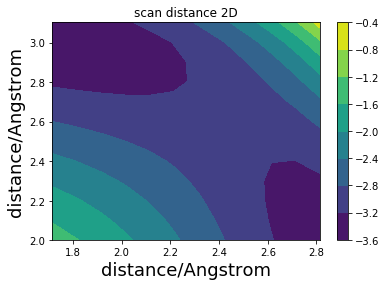

In [4]:
# plot 2D potential surface
pyplot.title('scan distance 2D')
pyplot.ylabel('distance Cl-C/Angstrom',fontsize=18)                
pyplot.xlabel('distance Br-C/Angstrom',fontsize=18)   
pyplot.contourf(df,ddf,scan)
pyplot.colorbar()
pyplot.show()

In [ ]:
np.max(scan)